<a href="https://colab.research.google.com/github/HanzhouLiu/python_fromzero/blob/main/Union_Find_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Union Find Leetcode 323
Given n nodes labeled from 0 to n - 1 and a list of undirected edges (each edge is a pair of nodes), write a function to find the number of connected components in an undirected graph.


---


```
Example 1:
     0          3
     |          |
     1 --- 2    4
Given n = 5 and edges = [[0, 1], [1, 2], [3, 4]], return 2.

Example 2:
     0           4
     |           |
     1 --- 2 --- 3
Given n = 5 and edges = [[0, 1], [1, 2], [2, 3], [3, 4]], return 1.
```
Note:
You can assume that no duplicate edges will appear in edges. Since all edges are undirected, [0, 1] is the same as [1, 0] and thus will not appear together in edges.

In [ ]:
class Solution:
    def countComponents(self, n, edges):
        par = [i for i in range(n)]
        rank = [1] * n

        def find(n1):
            res = n1

            while res != par[res]:
                par[res] = par[par[res]]  # this makes sense because the node
                res = par[res]  # is like an index
            return res
        
        def union(n1, n2):
            p1, p2 = find(n1), find(n2)

            if p1 == p2:
                return 0
            
            if rank[p2] > rank[p1]:
                par[p1] = p2
                rank[p2] += rank[p1]
            else:
                par[p2] = p1
                rank[p1] += rank[p2]
            return 1
        
        res = n
        for n1, n2 in edges:
            res -= union(n1, n2)
        return res

# Union Find Leetcode 547
There are n cities. Some of them are connected, while some are not. If city a is connected directly with city b, and city b is connected directly with city c, then city a is connected indirectly with city c.

A province is a group of directly or indirectly connected cities and no other cities outside of the group.

You are given an n x n matrix isConnected where isConnected[i][j] = 1 if the ith city and the jth city are directly connected, and isConnected[i][j] = 0 otherwise.

Return the total number of provinces


---

Graph is represented in Adjacency Matrix.

---
[link text](https://algorithms.tutorialhorizon.com/disjoint-set-union-find-algorithm-union-by-rank-and-path-compression/)
Union by rank:

Uses Find to determine the roots of the trees x and y belong to. If the roots are distinct, the trees are combined by attaching the root of one to the root of the other. If this is done naively, such as by always making x a child of y, the height of the trees can grow as O(n). We can optimize it by using union by rank.

Union by rank always attaches the shorter tree to the root of the taller tree.

To implement union by rank, each element is associated with a rank. Initially a set has one element and a rank of zero.

If we union two sets and

* Both trees have the same rank – the resulting set’s rank is one larger
* Both trees have the different ranks – the resulting set’s rank is the larger of the two. Ranks are used instead of height or depth because path compression will change the trees’ heights over time.


Worst case complexity: O(LogN)

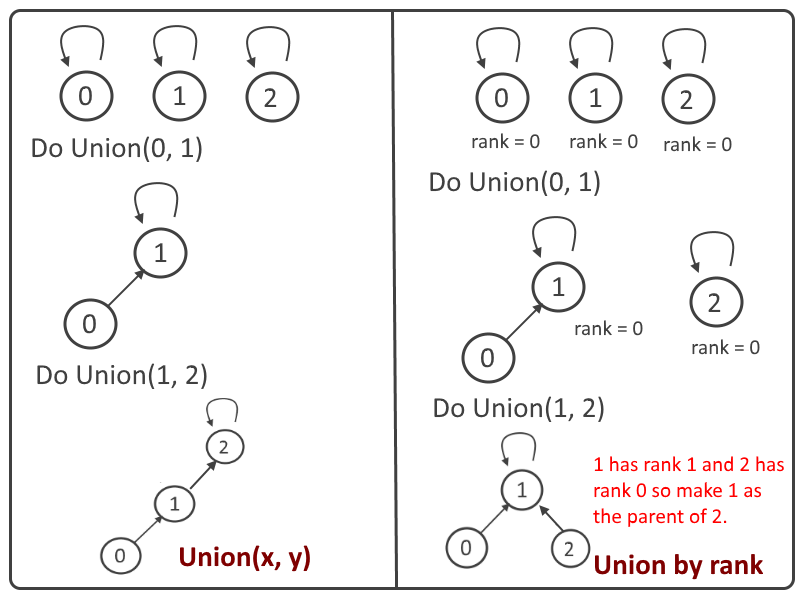

In [ ]:
class Solution(object):
    def findCircleNum(self, isConnected):
        """
        :type isConnected: List[List[int]]
        :rtype: int
        """
        res = n = len(isConnected)
        par = [i for i in range(n)]
        rank = [1] * n

        def find(n1):
            res = n1

            while res != par[res]:
                par[res] = par[par[res]]
                res = par[res]
            return res
        
        def union(n1, n2):
            p1, p2 = find(n1), find(n2)

            if p1 == p2:
                return 0
            
            if rank[p2] > rank[p1]:
                par[p1] = p2
                rank[p2] += rank[p1]
            else:
                par[p2] = p1
                rank[p1] += rank[p2]
            return 1

        for row in range(n):
            for col in range(row, n):
                if isConnected[row][col] == 1:
                    res -= union(row, col)
        return res

# 200. Number of Islands
Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.
[link text](https://www.guru99.com/difference-between-bfs-and-dfs.html#:~:text=BFS%20is%20implemented%20using%20a,implemented%20using%20a%20LIFO%20list.)

In [ ]:
class Solution(object):
    def numIslands(self, grid):
        """
        :type grid: List[List[str]]
        :rtype: int
        """
        cnt = 0
        visit = set()
        rows, cols = len(grid), len(grid[0])
        
        def bfs(r, c):
            q = []
            q.append([r, c])
            visit.add((r, c))
            while q:
                row, col = q.pop(0)
                directions = [[1, 0], [0, 1], [-1, 0], [0, -1]]
                for dr, dc in directions:
                    r, c = row + dr, col + dc
                    if (r in range(rows) and
                        c in range(cols) and
                        grid[r][c] == "1" and
                        (r, c) not in visit):
                        q.append([r, c])
                        visit.add((r, c))
            
            
        for r in range(len(grid)):
            for c in range(len(grid[0])):
                if grid[r][c] == "1" and (r, c) not in visit:
                    bfs(r, c)
                    cnt += 1
        return cnt